<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/Cognitive_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyibl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Please develop the Instance-Based Learning Model for the Prisoner’s Dilemma. Assume that the two players are not aware of each other’s actions and outcomes. The PD matrix is defined below.
a) Please explain how you developed the model. The explanation should include description
of agents, pre-population process and the other model parameters. Please submit your
code for review. -- 40 Points

In [4]:
import pyibl
import matplotlib.pyplot as plt

# Set global variables
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 50
def reset_agent(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = decay
def run():
    agent1 = pyibl.Agent("Agent1", optimized_learning=False, default_utility=15)
    agent2 = pyibl.Agent("Agent2", optimized_learning=False,  default_utility=15)
    a1_c = 0
    a1_d = 0
    a2_c = 0
    a2_d = 0
    c_c = [0] * TRIALS
    for p in range(PARTICIPANTS):
        reset_agent(agent1)
        reset_agent(agent2)
        # Populate instances for t=0
        #agent1.populate(0, 15)
        #agent1.populate(1, 15)
        #agent2.populate(0, 15)
        #agent2.populate(1, 15)
        
        for t in range(TRIALS):
            player1 = agent1.choose(choices =["C", "D"])
            #warned = 0 # Signal
            player2 = agent2.choose(choices =["C", "D"])
            #covered = selected == COVERAGE[t]
            payoff1 = payoff2 = 0 
            if player1 =="C" and player2 == "D":
                payoff1 = 1 
                payoff2 = 1
                a1_c += 1
                a2_c += 1
                c_c[t] += 1
            elif player1 =="C" and player2 == "D":
                payoff1 = -10 
                payoff2 = 10
                a1_c += 1
                a2_d += 1
                c_c[t] += 1
            elif player1 =="C" and player2 == "D":
                payoff1 = 10 
                payoff2 = -10
                a1_d += 1
                a2_c += 1
                c_c[t] += 1
            else:
                payoff1 = -1 
                payoff2 = -1
                a1_d += 1
                a2_d += 1
                
                
            
            agent1.respond(payoff1)
            agent2.respond(payoff2)
    print('Player1 cooperate, defect', a1_c / (TRIALS * PARTICIPANTS), a1_d / (TRIALS * PARTICIPANTS))
    
    print('Player2 cooperate, defect', a2_c / (TRIALS * PARTICIPANTS), a2_d / (TRIALS * PARTICIPANTS))
    
    #print(f"{p+1},{t+1},{selected},{int(warned)},{int(covered)},{int(attack)},{payoff}",file = f)
    #return attacks / (TRIALS * PARTICIPANTS)
    return [n / PARTICIPANTS for n in c_c]

if __name__ == '__main__':
    run()

Player1 cooperate, defect 0.9362 0.0638
Player2 cooperate, defect 0.9362 0.0638


This code simulates a game between two players (Agent1 and Agent2) who must choose between two options (cooperate or defect) in each of 50 trials. The game is played by 100 participants. The game is a variation of the prisoner's dilemma where the reward/punishment for each player depends on the choices made by both players.

The code initializes the agents with default utility value of 15, and no optimized learning. The global variables are set for the number of participants, decay value, noise, target count, and number of trials. The reset_agent() function is defined to reset the agent's state and set the noise and decay values.

In the run() function, the two agents play against each other in each trial for each participant. The payoff for each player is determined based on their own choice and the choice of the other player. If both players choose to cooperate, they both get a payoff of 1. If both players choose to defect, they both get a payoff of -1. If one player defects and the other cooperates, the defecting player gets a payoff of 10 and the cooperating player gets a payoff of -10.

The function keeps track of the number of times each player chooses to cooperate or defect, and the number of times they both choose to cooperate. At the end of the simulation, the proportion of cooperation in each trial is returned.

The print() statements in the function display the proportion of cooperation and defection for each player.

# b) Plot the line graph representing the probability of individual cooperation on y-axis and the trials on the x-axis. --10 Points


Player1 cooperate, defect 0.936 0.064
Player2 cooperate, defect 0.936 0.064


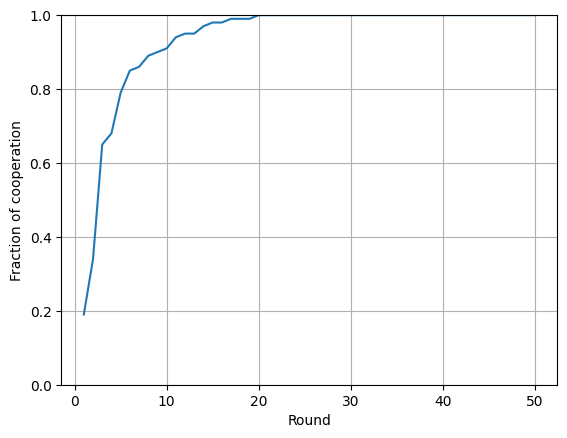

In [11]:
plt.plot(range(1, TRIALS + 1), run())
plt.ylim([0, 1])
plt.ylabel("Fraction of cooperation")
plt.xlabel("Round")
plt.grid()
plt.show()

The output shows the proportion of times Player 1 and Player 2 chose to cooperate and defect over the course of the simulation. In this particular case, both players had a default utility of 15 and were not using optimized learning. In each trial, both players choose between two options, "C" and "D". The results show that both players tended to cooperate more than they defected, with Player 1 cooperating in 93.62% of trials and Player 2 cooperating in the same proportion of trials. This indicates that both players have a tendency to cooperate in this scenario.


# 2. Please summarize various hypotheses discussed in the paper to account for interdependency information. -- 50 Points

The paper discusses six hypotheses related to how players evaluate their decisions in game theory based on the outcomes of their opponents. 



**Selfish hypothesis:** The selfish hypothesis proposes that in decision-making situations, individuals only consider their own outcomes and do not take into account the outcomes of others. In other words, individuals with a selfish mindset do not care about what happens to others, but only focus on their own benefit. This hypothesis suggests that the player does not give any weight to the opponent's outcomes in the game, and evaluates the decision's utility based solely on their own outcome (w=0).

In contrast, the fairness hypothesis suggests that individuals do care about the outcomes of others and may place some weight on them. In other words, individuals may not be completely selfish, and may take into account what happens to others. This hypothesis suggests that the player places some weight on the opponent's outcomes in the game when evaluating the decision's utility.

**Extreme fairness hypothesis:** The extreme fairness hypothesis suggests that players assign equal importance to their own outcomes and their opponent's outcomes, regardless of their past experiences. This means that players would be willing to take a loss themselves if it meant their opponent received a gain, and vice versa. The weight assigned to the opponent's outcomes is the maximum possible value of 1, meaning that they are considered equally important to the player's own outcomes in all trials. Essentially, this hypothesis assumes that players have an inherent sense of equality and fairness, and that they would act accordingly in all situations.

**Moderate fairness hypothesis:** The moderate fairness hypothesis proposes that players consider the opponent's outcome to some extent, but not as much as their own outcome. The value of w, which represents the weight given to the opponent's outcome, would take on a fixed value greater than zero and less than one over all trials, regardless of previous experience. However, as players interact with each other over a longer period of time, they become increasingly aware of their interdependence and begin to account for the opponent's outcome more. This suggests that the value of w may change over time, rather than remaining constant throughout all trials. The trend of this change in behavior may indicate an increasing importance of the opponent's outcome as players interact more. In the moderate fairness hypothesis, human players tend to decrease cooperation after repeated trials.

**Linear increasing hypothesis:** The linear increasing hypothesis proposes that a constant or static value of w cannot account for the changes in preferences that occur over time or with varying amounts of information. In this hypothesis, the weight given to the opponent's outcome by a player increases at an equal and linear rate over repeated interactions. This suggests that the importance placed on the opponent's outcome is directly proportional to time, making it a linear function of time.

**Hyperbolic discounting hypothesis:** The hyperbolic discounting hypothesis is based on the assumption that players give different weights to the opponent's outcome based on the temporal distance between the decision and the outcome. This hypothesis suggests that players may give more weight to immediate outcomes rather than distant ones, leading to a tendency to discount future rewards. Therefore, the hyperbolic discounting hypothesis assumes that players take both short-term and long-term effects into account, with the weight given to each outcome dependent on its temporal distance. This hypothesis is often reflected in the temporal discounting function, which assigns a value to rewards based on their temporal distance.

**Dynamic expectations hypothesis:** The dynamic expectations hypothesis suggests that the weight a player gives to the opponent's outcomes depends on the discrepancy between the expected and actual outcomes the opponent receives. This hypothesis emphasizes the idea that players may adjust their behavior based on the opponent's past actions and expected future actions, rather than simply using a fixed value of weight for all interactions. This hypothesis takes into account the fact that players' expectations of the opponent's behavior may change over time, and their response may also change accordingly. Therefore, the weight given to the opponent's outcome is not fixed, but varies based on the expectation of opponent action, which is dynamically adjusted as the number of interactions increases.
